In [129]:
import pandas as pd
import numpy as np

In [130]:
train = pd.read_csv("train_cleaned.csv")

In [131]:
train

,Unnamed: 0,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,TransactionDate,...,Latitude,Longitude,Terrorism,UserTenure,IsFraud,Income,Expenditure,GiftsTransaction,TransactionAmount,Transaction_Time_of_Day
0,0,8765,70,37,Female,Professional,Bachelor,Widowed,3,2023-03-12,...,-31.840233,145.612793,0,113,1,28884.43,14610.6100,2058.0196,258.1400,Afternoon
1,1,9645,3386,34,Male,Student,High School,Married,4,2023-03-05,...,-37.020100,144.964600,0,104,1,54919.07,39169.4900,9740.6316,34.9400,Evening
2,2,1145,2971,25,Male,Unemployed,Master,Married,2,2023-11-10,...,-31.840233,145.612793,0,105,0,74728.57,55873.7600,2253.7060,323.8200,Afternoon
3,3,15308,2925,25,Male,Professional,High School,Married,3,2023-10-07,...,-37.020100,144.964600,0,70,1,55712.62,36756.1064,4335.7000,13.3209,Night
4,4,14967,2339,38,Male,Professional,High School,Single,4,2023-09-22,...,-37.020100,144.964600,0,27,0,53004.70,17876.4182,4763.4800,467.7075,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,10961,11284,3632,25,Male,Unemployed,High School,Single,3,2023-06-04,...,-37.020100,144.964600,0,110,0,64488.68,21813.5300,5379.2788,182.5100,Evening
10962,10962,11964,3925,18,Female,Professional,High School,Married,2,2023-05-24,...,-37.020100,144.964600,0,91,1,80403.31,63429.0800,374.7716,137.5000,Night
10963,10963,5390,4811,22,Male,Unemployed,High School,Widowed,3,2023-12-26,...,-31.840233,145.612793,1,84,0,29048.42,18806.3100,100.0188,112.3700,Morning
10964,10964,860,1110,29,Female,Student,High School,Divorced,4,2023-07-16,...,-37.020100,144.964600,0,62,1,28654.66,9748.5300,2311.6436,68.0500,Night


In [132]:
categorical_variables = ["Occupation", "EducationLevel", "MaritalStatus", "Gender", "DeviceType", "TransactionType", "TransactionLocation", "Transaction_Time_of_Day"]

def one_hot_encoding(df, variables_to_encode):
    for var in variables_to_encode:
        one_hot_variable = pd.get_dummies(df[var])
        df.drop(var, axis = 1, inplace=True)
        df = df.join(one_hot_variable)

    return df

In [133]:
train = one_hot_encoding(train, categorical_variables)

In [134]:
train["GiftsTransaction"]

0         2058.0196
1         9740.6316
2         2253.7060
3         4335.7000
4         4763.4800
            ...    
10961     5379.2788
10962      374.7716
10963      100.0188
10964     2311.6436
10965    10797.0500
Name: GiftsTransaction, Length: 10966, dtype: float64

In [135]:
train.columns

Index(['Unnamed: 0', 'TransactionNumber', 'UserID', 'Age', 'NumDependents',
       'TransactionDate', 'MerchantID', 'Latitude', 'Longitude', 'Terrorism',
       'UserTenure', 'IsFraud', 'Income', 'Expenditure', 'GiftsTransaction',
       'TransactionAmount', 'Professional', 'Retired', 'Student', 'Unemployed',
       'Bachelor', 'High School', 'Master', 'PhD', 'Divorced', 'Married',
       'Single', 'Widowed', 'Female', 'Male', 'Desktop', 'Mobile', 'Tablet',
       'Payment', 'Purchase', 'Transfer', 'Withdrawal', 'Adelaide', 'Brisbane',
       'Canberra', 'Darwin', 'Hobart', 'Melbourne', 'Perth', 'Sydney',
       'Afternoon', 'Evening', 'Morning', 'Night'],
      dtype='object')

In [136]:
train

,Unnamed: 0,TransactionNumber,UserID,Age,NumDependents,TransactionDate,MerchantID,Latitude,Longitude,Terrorism,...,Canberra,Darwin,Hobart,Melbourne,Perth,Sydney,Afternoon,Evening,Morning,Night
0,0,8765,70,37,3,2023-03-12,M006,-31.840233,145.612793,0,...,False,False,False,False,False,False,True,False,False,False
1,1,9645,3386,34,4,2023-03-05,M002,-37.020100,144.964600,0,...,True,False,False,False,False,False,False,True,False,False
2,2,1145,2971,25,2,2023-11-10,M008,-31.840233,145.612793,0,...,False,False,False,False,False,False,True,False,False,False
3,3,15308,2925,25,3,2023-10-07,M001,-37.020100,144.964600,0,...,False,True,False,False,False,False,False,False,False,True
4,4,14967,2339,38,4,2023-09-22,M001,-37.020100,144.964600,0,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,10961,11284,3632,25,3,2023-06-04,M007,-37.020100,144.964600,0,...,True,False,False,False,False,False,False,True,False,False
10962,10962,11964,3925,18,2,2023-05-24,M003,-37.020100,144.964600,0,...,False,False,True,False,False,False,False,False,False,True
10963,10963,5390,4811,22,3,2023-12-26,M002,-31.840233,145.612793,1,...,True,False,False,False,False,False,False,False,True,False
10964,10964,860,1110,29,4,2023-07-16,M004,-37.020100,144.964600,0,...,True,False,False,False,False,False,False,False,False,True


In [162]:
X = train[["UserID", "Age", "NumDependents", "Melbourne", "Male", "UserTenure", "Income", "Expenditure", "GiftsTransaction", "TransactionAmount", "Professional", "Retired", "Student", "Unemployed", "Bachelor", "High School", "Master", "PhD", "Divorced", "Married", "Single", "Widowed", "Desktop", "Mobile", "Tablet", "Withdrawal", "Night"]]

In [163]:
X

,UserID,Age,NumDependents,Melbourne,Male,UserTenure,Income,Expenditure,GiftsTransaction,TransactionAmount,...,PhD,Divorced,Married,Single,Widowed,Desktop,Mobile,Tablet,Withdrawal,Night
0,70,37,3,False,False,113,28884.43,14610.6100,2058.0196,258.1400,...,False,False,False,False,True,False,True,False,True,False
1,3386,34,4,False,True,104,54919.07,39169.4900,9740.6316,34.9400,...,False,False,True,False,False,False,True,False,True,False
2,2971,25,2,False,True,105,74728.57,55873.7600,2253.7060,323.8200,...,False,False,True,False,False,False,True,False,False,False
3,2925,25,3,False,True,70,55712.62,36756.1064,4335.7000,13.3209,...,False,False,True,False,False,False,True,False,False,True
4,2339,38,4,True,True,27,53004.70,17876.4182,4763.4800,467.7075,...,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,3632,25,3,False,True,110,64488.68,21813.5300,5379.2788,182.5100,...,False,False,False,True,False,False,True,False,False,False
10962,3925,18,2,False,False,91,80403.31,63429.0800,374.7716,137.5000,...,False,False,True,False,False,False,True,False,False,True
10963,4811,22,3,False,True,84,29048.42,18806.3100,100.0188,112.3700,...,False,False,False,False,True,False,True,False,False,False
10964,1110,29,4,False,False,62,28654.66,9748.5300,2311.6436,68.0500,...,False,True,False,False,False,False,True,False,False,True


In [164]:
Y = train["IsFraud"]

In [165]:
from sklearn.model_selection import KFold

In [166]:
# %pip install xgboost

In [167]:
nfolds= 5
folds = KFold(n_splits=nfolds)

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,random_state=0)

In [169]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators = 5000,
                        learning_rate = 0.005,
                        use_label_encoder = False,
                        eval_metric = "logloss",
                        n_jobs = -1)

In [170]:
# test = pd.read_csv("test_cleaned.csv")
# test

In [171]:
xgb_clf.fit(X_train, y_train,                    
            verbose = False)

C:\Users\ryang\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:10:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.005, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5000,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

In [172]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [173]:
pred_test = xgb_clf.predict(X_test)
test_score = accuracy_score(pred_test, y_test)
print("Test score:", np.round(test_score,2))

Test score: 0.98


In [174]:
f1_score_val = f1_score(y_test, pred_test)
print(f1_score_val)

0.9763700351935646


In [271]:
test = pd.read_csv("test_cleaned.csv")

In [272]:
categorical_variables = ["Occupation", "EducationLevel", "MaritalStatus", "Gender", "DeviceType", "TransactionType", "TransactionLocation", "Transaction_Time_of_Day"]

def one_hot_encoding(df, variables_to_encode):
    for var in variables_to_encode:
        one_hot_variable = pd.get_dummies(df[var])
        df.drop(var, axis = 1, inplace=True)
        df = df.join(one_hot_variable)

    return df

In [273]:
test = one_hot_encoding(test, categorical_variables)

In [128]:
X_test_final = test[["Age", "NumDependents", "Melbourne", "Male", "UserTenure", "Income", "Expenditure", "GiftsTransaction", "TransactionAmount", "Professional", "Retired", "Student", "Unemployed", "Bachelor", "High School", "Master", "PhD", "Divorced", "Married", "Single", "Widowed", "Desktop", "Mobile", "Tablet", "Withdrawal", "Afternoon", "Evening", "Morning", "Night"]]

NameError: name 'test' is not defined

In [275]:
pred_test_final = xgb_clf.predict(X_test_final)

In [276]:
pred_test_final

array([1, 0, 0, ..., 0, 0, 0])

In [277]:
test

,Unnamed: 0,TransactionNumber,UserID,Age,NumDependents,TransactionDate,TransactionTime,MerchantID,Latitude,Longitude,...,Canberra,Darwin,Hobart,Melbourne,Perth,Sydney,Afternoon,Evening,Morning,Night
0,0,11854,963,35,4,2023-09-08,23:59:59,M005,-37.020100,144.964600,...,0,1,0,0,0,0,0,0,0,1
1,1,2647,1693,23,2,2023-08-05,08:23:18 AM,M003,-37.020100,144.964600,...,0,1,0,0,0,0,0,0,1,0
2,2,5945,4383,44,2,2023-03-05,08:15:15,M004,-30.000233,136.209152,...,0,0,0,0,0,0,0,0,1,0
3,3,6798,1350,40,3,2023-05-23,05:51:01 PM,M008,-37.020100,144.964600,...,1,0,0,0,0,0,1,0,0,0
4,4,12985,4145,18,3,2023-11-04,19:32:17,M008,-20.917574,142.702789,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7307,7307,2636,498,40,4,2023-12-17,15:04:47,M007,-37.020100,144.964600,...,0,0,0,0,1,0,1,0,0,0
7308,7308,14557,4707,52,0,2023-07-10,05:40:15,M008,-31.840233,145.612793,...,0,0,0,0,0,0,0,0,0,1
7309,7309,296,1426,42,3,2023-07-01,23:59:59,M006,-37.020100,144.964600,...,0,0,1,0,0,0,0,0,0,1
7310,7310,1864,4605,39,0,2023-12-10,07:17:03,M008,-31.840233,145.612793,...,0,1,0,0,0,0,0,0,1,0


In [278]:
submission = {"TransactionNumber" : test['TransactionNumber'], "IsFraud": pred_test_final}
df_submission = pd.DataFrame.from_dict(submission)

In [279]:
df_submission

,TransactionNumber,IsFraud
0,11854,1
1,2647,0
2,5945,0
3,6798,1
4,12985,0
...,...,...
7307,2636,1
7308,14557,1
7309,296,0
7310,1864,0


In [280]:
df_submission["IsFraud"].value_counts()

0    4533
1    2779
Name: IsFraud, dtype: int64

In [281]:
df_submission.to_csv("submission_1.csv", index=False)

In [334]:
df_submission

,TransactionNumber,IsFraud
0,11854,1
1,2647,0
2,5945,0
3,6798,1
4,12985,0
...,...,...
7307,2636,1
7308,14557,1
7309,296,0
7310,1864,0


lgbm + bagging + hyperparam

In [46]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.utils import resample
import optuna

C:\Users\ryang\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
# Step 1: Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

n_models = 10
model_list = []
test_predictions = np.zeros((X_test.shape[0],))  # Placeholder for predictions on test set

# Bagging loop
for i in range(n_models):
    # Step 2: Bootstrap sampling from the training set
    X_resampled, Y_resampled = resample(X_train, Y_train, random_state=i)
    
    # Initialize the LGBM Classifier
    clf = lgb.LGBMClassifier()
    
    # Train the model on the resampled training data
    clf.fit(X_resampled, Y_resampled)
    
    # Store the model for further use
    model_list.append(clf)
    
    # Step 3: Make predictions on the test set
    pred = clf.predict(X_test)
    
    # Aggregate predictions (e.g., majority voting or averaging probabilities)
    test_predictions += pred

# Step 4: Final predictions (majority voting)
y_pred = np.where(test_predictions / n_models > 0.5, 1, 0)

# Step 5: Evaluate the accuracy on the test set using F1 score
f1_score_val = f1_score(Y_test, y_pred)
print(f'Bagging Model F1 Score on Test Set: {f1_score_val:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3198, number of negative: 5574
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1233
[LightGBM] [Info] Number of data points in the train set: 8772, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364569 -> initscore=-0.555587
[LightGBM] [Info] Start training from score -0.555587
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3183, number of negative: 5589
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1233
[LightGBM] [Info] Number of data points in the train set: 8772, number of used featu

In [63]:
# # Function to tune hyperparameters using Optuna
# def objective(trial):
#     param = {
#         'objective': 'binary',  # Binary classification
#         'boosting_type': 'gbdt',
#         'metric': 'binary_logloss',
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 100),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 100),
#         'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
#         'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
#         'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
#         'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 7)
#     }

#     # Split data for tuning
#     X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
    
#     # Train the LightGBM model using LGBMClassifier
#     clf = lgb.LGBMClassifier(**param)
#     clf.fit(X_train, Y_train, eval_set=[(X_val, Y_val)])
    
#     # Make predictions on the validation set
#     pred = clf.predict(X_val)
    
#     # Evaluate the accuracy
#     accuracy = accuracy_score(Y_val, pred)
    
#     return accuracy

# # Number of bagged models
# n_models = 5
# model_list = []
# predictions = np.zeros((X.shape[0],))  # Placeholder for predictions
# accuracies = []

# # Bagging loop with hyperparameter tuning
# for i in range(n_models):
#     # Bootstrap sampling with replacement
#     X_resampled, Y_resampled = resample(X, Y, random_state=i)
    
#     # Optuna study to tune hyperparameters
#     study = optuna.create_study(direction='maximize')
#     study.optimize(objective, n_trials=20)  # Try 20 hyperparameter sets
    
#     # Get the best hyperparameters
#     best_params = study.best_params
    
#     # Train a LightGBM model with the best parameters
#     clf = lgb.LGBMClassifier(**best_params)
#     clf.fit(X_resampled, Y_resampled)
    
#     # Store the trained model
#     model_list.append(clf)
    
#     # Make predictions on the full dataset (or validation set)
#     pred = clf.predict(X)
    
#     # Aggregate predictions (for classification, majority voting)
#     predictions += pred

# # Final predictions (majority voting)
# final_predictions = np.where(predictions / n_models > 0.5, 1, 0)

# # Evaluate the final model accuracy
# accuracy = f1_score(Y, final_predictions)
# print(f'Bagging with Hyperparameter Tuning Model F1 Score: {accuracy:.4f}')

<Axes: >

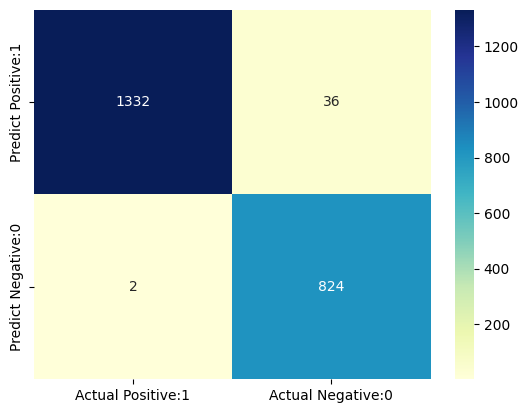

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, y_pred)



cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

trying catboost

In [67]:
train = pd.read_csv("train_cleaned.csv")

In [68]:
train.columns

Index(['Unnamed: 0', 'TransactionNumber', 'UserID', 'Age', 'Gender',
       'Occupation', 'EducationLevel', 'MaritalStatus', 'NumDependents',
       'TransactionDate', 'MerchantID', 'TransactionType',
       'TransactionLocation', 'DeviceType', 'Latitude', 'Longitude',
       'Terrorism', 'UserTenure', 'IsFraud', 'Income', 'Expenditure',
       'GiftsTransaction', 'TransactionAmount', 'Transaction_Time_of_Day'],
      dtype='object')

In [79]:
X_cat = train[["EducationLevel", "Age", "Gender", "Occupation", "MaritalStatus", "TransactionType", "TransactionLocation", "DeviceType", "Terrorism", "UserTenure", "Income", "Expenditure", "GiftsTransaction", "TransactionAmount", "Transaction_Time_of_Day"]]
Y_cat = train["IsFraud"]

In [72]:
%pip install catboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
    --------------------------------------- 2.1/101.7 MB 11.8 MB/s eta 0:00:09
   - -------------------------------------- 4.2/101.7 MB 10.9 MB/s eta 0:00:09
   -- ------------------------------------- 6.6/101.7 MB 11.2 MB/s eta 0:00:09
   --- ------------------------------------ 8.9/101.7 MB 11.1 MB/s eta 0:00:09
   ---- ----------------------------------- 11.3/101.7 MB 11.2 MB/s eta 0:00:09
   ----- ---------------------------------- 13.6/101.7 MB 11.4 MB/s eta 0:00:08
   ------ --------------------------------- 16.3/101.7 MB 11.4 MB/s eta 0:00:08
   ------- -------------------------------- 17.8/101.7 MB 10.9 MB/s eta 0:00:08
   ------- -------------------------------- 19.4/101.7 MB 10.6 MB/s eta 0:00:08
   -------- ------------------------------- 21.8/101.7 MB 10.7 MB/s eta 0:00:08
   --------- ------------------------------ 24.4/101.7 

In [73]:
import catboost
from catboost import CatBoostClassifier

In [127]:
# Step 1: Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

n_models = 10
model_list = []
test_predictions = np.zeros((X_test.shape[0],))  # Placeholder for predictions on test set

# Bagging loop
for i in range(n_models):
    # Step 2: Bootstrap sampling from the training set
    X_resampled, Y_resampled = resample(X_train, Y_train, random_state=i)
    
    # Initialize the CatBoost Classifier
    clf = CatBoostClassifier(
        iterations=1000,  # Number of boosting iterations
        learning_rate=0.1,  # Learning rate
        depth=6,  # Depth of trees
        loss_function='Logloss',  # Loss function for binary classification
        cat_features=[]  # List of categorical feature indices if any
    )
    
    # Train the model on the resampled training data
    clf.fit(X_resampled, Y_resampled, verbose=0)
    
    # Store the model for further use
    model_list.append(clf)
    
    # Step 3: Make predictions on the test set
    pred = clf.predict(X_test)
    
    # Aggregate predictions (e.g., majority voting)
    test_predictions += pred

# Step 4: Final predictions (majority voting)
final_test_predictions = np.where(test_predictions / n_models > 0.5, 1, 0)

# Step 5: Evaluate the accuracy on the test set using F1 score
f1_score_val = f1_score(Y_test, final_test_predictions)
print(f'Bagging Model F1 Score on Test Set: {f1_score_val:.4f}')

Bagging Model F1 Score on Test Set: 0.9786


In [91]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 500, 5000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True),
        'depth': trial.suggest_int('depth', 4, 12),
        'loss_function': 'Logloss',  # Binary classification
        'cat_features': []  # List of categorical feature indices if any
    }
    
    # Bootstrap sampling from the training set
    X_resampled, Y_resampled = resample(X_train, Y_train, random_state=trial.number)
    
    # Split resampled data into training and validation sets for hyperparameter tuning
    X_val_train, X_val, Y_val_train, Y_val = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=trial.number)
    
    # Initialize the CatBoost Classifier with the trial parameters
    clf = CatBoostClassifier(**param, verbose=0)
    
    # Train the model
    clf.fit(X_val_train, Y_val_train)
    
    # Make predictions on the validation set
    pred = clf.predict(X_val)
    
    # Evaluate the accuracy
    f1 = f1_score(Y_val, pred)
    return f1

# Optuna study for hyperparameter tuning
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Number of trials

# Get the best hyperparameters
best_params = study.best_params
print(f'Best Hyperparameters: {best_params}')

# Bagging loop with the best hyperparameters
n_models = 10
model_list = []
test_predictions = np.zeros((X_test.shape[0],))  # Placeholder for predictions on test set

for i in range(n_models):
    # Bootstrap sampling from the training set
    X_resampled, Y_resampled = resample(X_train, Y_train, random_state=i)
    
    # Initialize the CatBoost Classifier with the best hyperparameters
    clf = CatBoostClassifier(**best_params, verbose=0)
    
    # Train the model on the resampled training data
    clf.fit(X_resampled, Y_resampled)
    
    # Store the model for further use
    model_list.append(clf)
    
    # Make predictions on the test set
    pred = clf.predict(X_test)
    
    # Aggregate predictions (e.g., majority voting)
    test_predictions += pred

# Final predictions (majority voting)
final_test_predictions = np.where(test_predictions / n_models > 0.5, 1, 0)

# Evaluate the accuracy on the test set using F1 score
f1_score_val = f1_score(Y_test, final_test_predictions)
print(f'Bagging Model F1 Score on Test Set: {f1_score_val:.4f}')

[I 2024-09-14 19:44:50,963] A new study created in memory with name: no-name-a086e5ac-2a88-4758-8f21-2589c7bc3f47
[I 2024-09-14 19:45:09,612] Trial 0 finished with value: 0.9485530546623794 and parameters: {'iterations': 2413, 'learning_rate': 0.00021534257419132696, 'depth': 10}. Best is trial 0 with value: 0.9485530546623794.
[I 2024-09-14 19:45:15,519] Trial 1 finished with value: 0.9642041127189642 and parameters: {'iterations': 2966, 'learning_rate': 0.000634316279754078, 'depth': 5}. Best is trial 1 with value: 0.9642041127189642.
[I 2024-09-14 19:45:18,677] Trial 2 finished with value: 0.9565879664889566 and parameters: {'iterations': 1685, 'learning_rate': 0.001000205394388847, 'depth': 4}. Best is trial 1 with value: 0.9642041127189642.
[I 2024-09-14 19:45:27,892] Trial 3 finished with value: 0.9545454545454546 and parameters: {'iterations': 3565, 'learning_rate': 0.00018408856106670482, 'depth': 7}. Best is trial 1 with value: 0.9642041127189642.
[I 2024-09-14 19:45:36,822] T

Best Hyperparameters: {'iterations': 1540, 'learning_rate': 0.00781865546118519, 'depth': 10}
Bagging Model F1 Score on Test Set: 0.9763
